# Lead Scoring Assingment

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1. Reading and understanding the data

In [2]:
#read dataset
lead_df=pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.shape

(9240, 37)

There are 9240 rows and 37 columns

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are null values present in the dataset which have to be removed/impute.
Will be done in Data Cleaning step.

In [6]:
# Checking DataTypes
lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

There are columns of all types , which can be check after data cleaning part is done where imputation of null values and outliers will be done

In [7]:
# statstical checks for numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2. Data Cleaning

Dropping/Imputation of the columns/rows will be done for null values and outliers.

In [8]:
lead_df = lead_df.replace('Select', np.nan)

In [9]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#checking for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#checking percentage for the null values
nullColumns=round(lead_df.isnull().sum()*100/lead_df.shape[0],2)
nullColumns

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Columns having high percentage of missing values > 45
nullColumns=nullColumns[nullColumns>=45]
nullColumns

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [13]:
# lets drop this columns from the data
lead_df.drop(labels=nullColumns.index,axis=1,inplace=True)

In [14]:
#after dropping columns
lead_df.shape

(9240, 30)

Now there are 30 columns are present. 

In [15]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [16]:
lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

### Checking and imputing categorical values

#### 1. Lead Origin

In [17]:
lead_df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [18]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

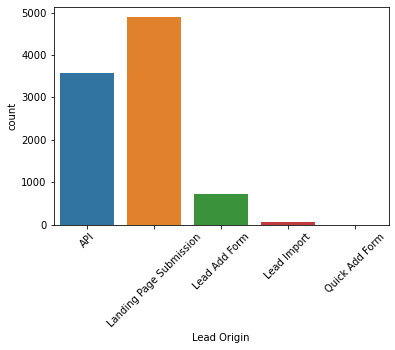

In [19]:
sns.countplot(lead_df['Lead Origin'])
plt.xticks(rotation=45)
plt.show()

In [20]:
#Checking for percantage of distibution
(lead_df['Lead Origin'].value_counts()*100)/lead_df.shape[0]

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [21]:
lead_df.loc[(lead_df['Lead Origin'] == 'Lead Add Form'),'Lead Origin']='Other Leads'
lead_df.loc[(lead_df['Lead Origin'] == 'Lead Import'),'Lead Origin']='Other Leads'
lead_df.loc[(lead_df['Lead Origin'] == 'Quick Add Form'),'Lead Origin']='Other Leads'

In [22]:
#Checking for percantage of distibution
(lead_df['Lead Origin'].value_counts()*100)/lead_df.shape[0]

Landing Page Submission    52.878788
API                        38.744589
Other Leads                 8.376623
Name: Lead Origin, dtype: float64

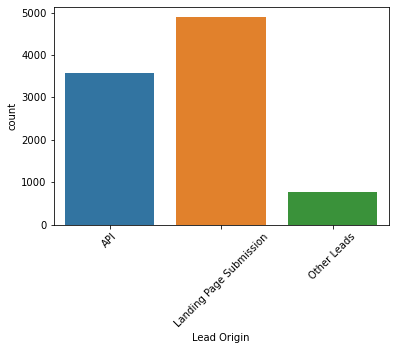

In [23]:
sns.countplot(lead_df['Lead Origin'])
plt.xticks(rotation=45)
plt.show()

#### 2. Lead Source

In [24]:
lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [25]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [26]:
#It can be seen than, Google is coming the most times , hence replacing NaN value with value - Google
lead_df['Lead Source'] = lead_df['Lead Source'].fillna("Google")

In [27]:
lead_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

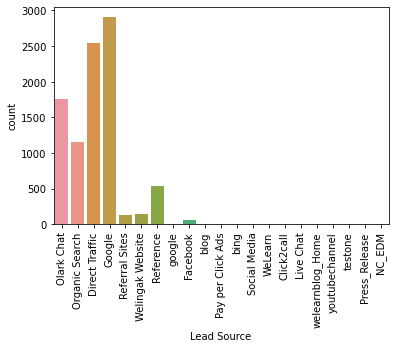

In [28]:
sns.countplot(lead_df['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [29]:
#Checking for percantage of distibution
LeadSourceCol=(lead_df['Lead Source'].value_counts()*100)/lead_df.shape[0]
LeadSourceCol

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
blog                  0.010823
Pay per Click Ads     0.010823
NC_EDM                0.010823
youtubechannel        0.010823
WeLearn               0.010823
testone               0.010823
welearnblog_Home      0.010823
Name: Lead Source, dtype: float64

In [30]:
#Lead Source Columns having less than 10% values
LeadSourceCol=LeadSourceCol[LeadSourceCol<10]
LeadSourceCol

Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
bing                 0.064935
google               0.054113
Click2call           0.043290
Social Media         0.021645
Live Chat            0.021645
Press_Release        0.021645
blog                 0.010823
Pay per Click Ads    0.010823
NC_EDM               0.010823
youtubechannel       0.010823
WeLearn              0.010823
testone              0.010823
welearnblog_Home     0.010823
Name: Lead Source, dtype: float64

In [31]:
for i in LeadSourceCol.index:
    lead_df.loc[(lead_df['Lead Source'] == i),'Lead Source']='Other Source'

In [32]:
#Checking for percantage of distibution
(lead_df['Lead Source'].value_counts()*100)/lead_df.shape[0]

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Other Source       9.567100
Name: Lead Source, dtype: float64

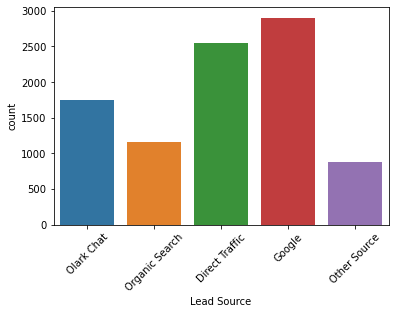

In [33]:
sns.countplot(lead_df['Lead Source'])
plt.xticks(rotation=45)
plt.show()

#### 3. Do Not Email

In [34]:
lead_df['Do Not Email'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
lead_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

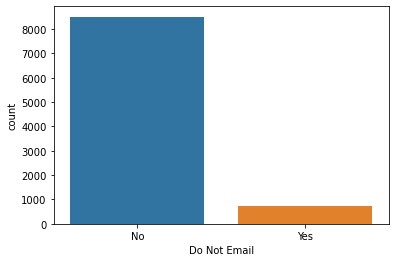

In [36]:
sns.countplot(lead_df['Do Not Email'])
plt.show()

In [37]:
#Checking for percantage of distibution
(lead_df['Do Not Email'].value_counts()*100)/lead_df.shape[0]

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [38]:
# dropping the column from the data
lead_df.drop(labels='Do Not Email',axis=1,inplace=True)

#### 4. Do Not Call 

In [39]:
lead_df['Do Not Call'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
lead_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [41]:
#Checking for percantage of distibution
(lead_df['Do Not Call'].value_counts()*100)/lead_df.shape[0]

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [42]:
# dropping the column from the data
lead_df.drop(labels='Do Not Call',axis=1,inplace=True)

#### 5. Last Activity

In [43]:
lead_df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

As we can see, that Last Activity column , have null values, so before further observation we have to impute it first. For categorical columns we replace the null values with the most no. times values occuring in the column, i.e. have to find mode and replace it

In [44]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')

In [46]:
lead_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

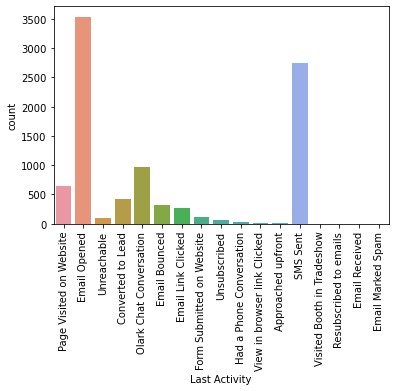

In [47]:
sns.countplot(lead_df['Last Activity'])
plt.xticks(rotation=90)
plt.show()

In [48]:
#Checking for percantage of distibution
LastActivityCol=(lead_df['Last Activity'].value_counts()*100)/lead_df.shape[0]
LastActivityCol

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [49]:
#Last Activity Columns having less than 5% values
LastActivityCol=LastActivityCol[LastActivityCol<5]
LastActivityCol

Converted to Lead               4.632035
Email Bounced                   3.528139
Email Link Clicked              2.889610
Form Submitted on Website       1.255411
Unreachable                     1.006494
Unsubscribed                    0.660173
Had a Phone Conversation        0.324675
Approached upfront              0.097403
View in browser link Clicked    0.064935
Email Received                  0.021645
Email Marked Spam               0.021645
Visited Booth in Tradeshow      0.010823
Resubscribed to emails          0.010823
Name: Last Activity, dtype: float64

In [50]:
for i in LastActivityCol.index:
    lead_df.loc[(lead_df['Last Activity'] == i),'Last Activity']='Other Last Activity'

In [51]:
#Checking for percantage of distibution
(lead_df['Last Activity'].value_counts()*100)/lead_df.shape[0]

Email Opened               38.311688
SMS Sent                   29.707792
Other Last Activity        14.523810
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Name: Last Activity, dtype: float64

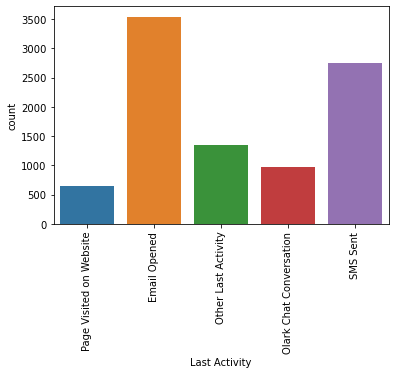

In [52]:
sns.countplot(lead_df['Last Activity'])
plt.xticks(rotation=90)
plt.show()

#### 5. Country

In [53]:
lead_df['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [54]:
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
China                      2
Italy                      2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Ghana                      2
Bangladesh                 2
Belgium                    2
Vietnam                    1
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Russia                     1
Liberia                    1
Indonesia     

In [55]:
#It can be seen than, India is coming the most times , hence replacing NaN value with value - India
lead_df['Country'] = lead_df['Country'].fillna("India")

In [56]:
lead_df['Country'].unique()

array(['India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [57]:
lead_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
China                      2
Italy                      2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Ghana                      2
Bangladesh                 2
Belgium                    2
Vietnam                    1
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Russia                     1
Liberia                    1
Indonesia     

In [58]:
# dropping the column from the data
lead_df.drop(labels='Country',axis=1,inplace=True)

#### 6. Specialization

In [59]:
lead_df['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [60]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

In [61]:
lead_df['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [62]:
#Checking for percantage of distibution
OtherCol=(lead_df['Specialization'].value_counts()*100)/lead_df.shape[0]
OtherCol

Others                               36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

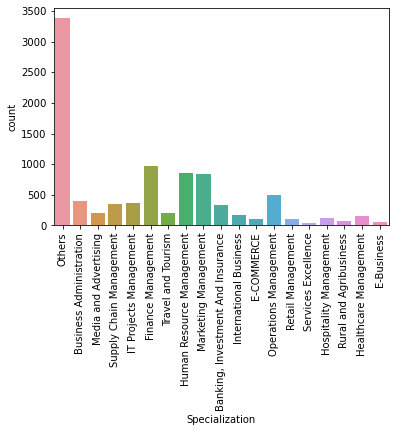

In [63]:
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [64]:
#As we can see, the many Specialization types have very less collectively share (which is less than 2 %)
# So we can put all them into Others category, which may be helpful for observations
#Specialization Column values having less than 2% values
OtherCol=OtherCol[OtherCol<2]
for i in OtherCol.index:
    lead_df.loc[(lead_df['Specialization'] == i),'Specialization']='Others'
#Checking for percantage of distibution
(lead_df['Specialization'].value_counts()*100)/lead_df.shape[0]

Others                               45.595238
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
Name: Specialization, dtype: float64

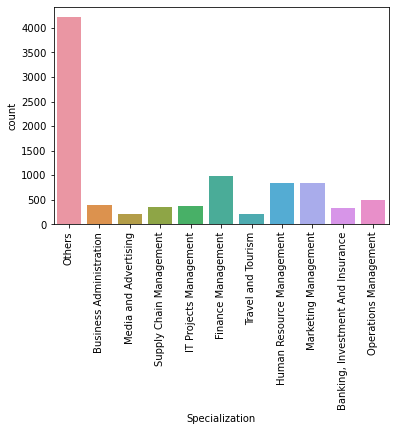

In [65]:
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

#### 7. What is your current occupation

In [66]:
lead_df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [67]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [68]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna("Unemployed")

In [69]:
lead_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

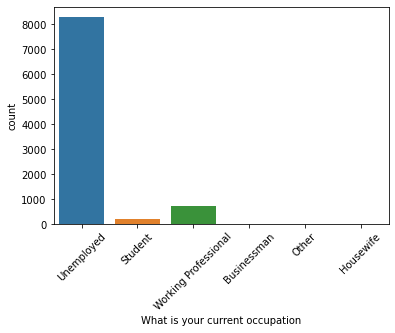

In [70]:
sns.countplot(lead_df['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [71]:
#Checking for percantage of distibution
LeadSourceCol=(lead_df['What is your current occupation'].value_counts()*100)/lead_df.shape[0]
LeadSourceCol

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### 8. What matters most to you in choosing a course

In [72]:
lead_df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [73]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [74]:
#It can be seen than, Google is coming the most times , hence replacing NaN value with value - Google
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna("Better Career Prospects")

In [75]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [76]:
#Checking for percantage of distibution
(lead_df['What matters most to you in choosing a course'].value_counts()*100)/lead_df.shape[0]

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [77]:
# dropping the column from the data
lead_df.drop(labels='What matters most to you in choosing a course',axis=1,inplace=True)

#### 9. Search 

In [78]:
lead_df['Search'].unique()

array(['No', 'Yes'], dtype=object)

In [79]:
lead_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [80]:
#Checking for percantage of distibution
(lead_df['Search'].value_counts()*100)/lead_df.shape[0]

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [81]:
# dropping the column from the data , as it is highly skewed.
lead_df.drop(labels='Search',axis=1,inplace=True)

#### 10. Magazine

In [82]:
lead_df['Magazine'].unique()

array(['No'], dtype=object)

In [83]:
# dropping the column from the data , as it is seems, the column have only one value.
lead_df.drop(labels='Magazine',axis=1,inplace=True)

#### 11. Newspaper Article

In [84]:
lead_df['Newspaper Article'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
#Checking for percantage of distibution
(lead_df['Newspaper Article'].value_counts()*100)/lead_df.shape[0]

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [86]:
# dropping the column from the data , as it is highly skewed.
lead_df.drop(labels='Newspaper Article',axis=1,inplace=True)

#### 12. X Education Forums

In [87]:
lead_df['X Education Forums'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
#Checking for percantage of distibution
(lead_df['X Education Forums'].value_counts()*100)/lead_df.shape[0]

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [89]:
# dropping the column from the data , as it is highly skewed.
lead_df.drop(labels='X Education Forums',axis=1,inplace=True)

#### 13. Newspaper 

In [90]:
lead_df['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
#Checking for percantage of distibution
(lead_df['Newspaper'].value_counts()*100)/lead_df.shape[0]

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [92]:
# dropping the column from the data , as it is highly skewed.
lead_df.drop(labels='Newspaper',axis=1,inplace=True)

#### 14. Digital Advertisement

In [93]:
lead_df['Digital Advertisement'].unique()

array(['No', 'Yes'], dtype=object)

In [94]:
#Checking for percantage of distibution
(lead_df['Digital Advertisement'].value_counts()*100)/lead_df.shape[0]

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [95]:
# dropping the column from the data , as it is highly skewed.
lead_df.drop(labels='Digital Advertisement',axis=1,inplace=True)

#### 15. Through Recommendations

In [96]:
lead_df['Through Recommendations'].unique()

array(['No', 'Yes'], dtype=object)

In [97]:
#Checking for percantage of distibution
(lead_df['Through Recommendations'].value_counts()*100)/lead_df.shape[0]

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [98]:
# dropping the column from the data , as it is highly skewed.
lead_df.drop(labels='Through Recommendations',axis=1,inplace=True)

#### 16. Receive More Updates About Our Courses

In [99]:
lead_df['Receive More Updates About Our Courses'].unique()

array(['No'], dtype=object)

In [100]:
# dropping the column from the data , as it is seems, the column have only one value.
lead_df.drop(labels='Receive More Updates About Our Courses',axis=1,inplace=True)

#### 17. Tags

In [101]:
lead_df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [102]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [103]:
#It can be seen than, "Will revert after reading the email" is coming the most times , hence replacing NaN value with value this.
lead_df['Tags'] = lead_df['Tags'].fillna("Will revert after reading the email")

In [104]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

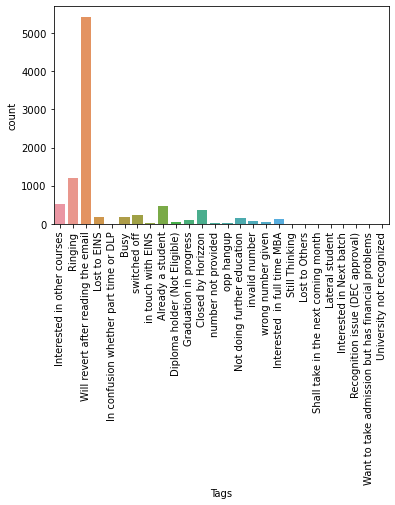

In [105]:
sns.countplot(lead_df['Tags'])
plt.xticks(rotation=90)
plt.show()

In [106]:
#Checking for percantage of distibution
TagsCol=(lead_df['Tags'].value_counts()*100)/lead_df.shape[0]
TagsCol

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [107]:
#Tags Columns having less than 3% values
TagsCol=TagsCol[TagsCol<3]
for i in TagsCol.index:
    lead_df.loc[(lead_df['Tags'] == i),'Tags']='Other Tags'

In [108]:
#Checking for percantage of distibution
(lead_df['Tags'].value_counts()*100)/lead_df.shape[0]

Will revert after reading the email    58.712121
Other Tags                             13.809524
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
Name: Tags, dtype: float64

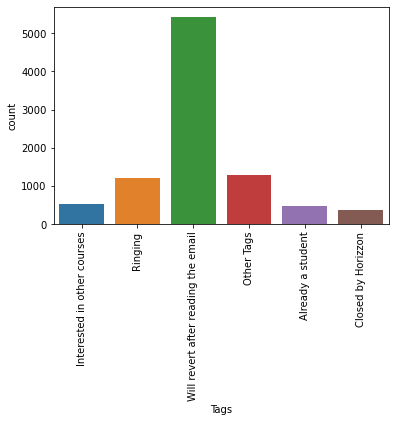

In [109]:
sns.countplot(lead_df['Tags'])
plt.xticks(rotation=90)
plt.show()

#### 18. Update me on Supply Chain Content

In [110]:
lead_df['Update me on Supply Chain Content'].unique()

array(['No'], dtype=object)

In [111]:
# dropping the column from the data , as it is seems, the column have only one value.
lead_df.drop(labels='Update me on Supply Chain Content',axis=1,inplace=True)

#### 19. Get updates on DM Content

In [112]:
lead_df['Get updates on DM Content'].unique()

array(['No'], dtype=object)

In [113]:
# dropping the column from the data , as it is seems, the column have only one value.
lead_df.drop(labels='Get updates on DM Content',axis=1,inplace=True)

#### 20. I agree to pay the amount through cheque

In [114]:
lead_df['I agree to pay the amount through cheque'].unique()

array(['No'], dtype=object)

In [115]:
# dropping the column from the data , as it is seems, the column have only one value.
lead_df.drop(labels='I agree to pay the amount through cheque',axis=1,inplace=True)

#### 21. A free copy of Mastering The Interview

In [116]:
lead_df['A free copy of Mastering The Interview'].unique()

array(['No', 'Yes'], dtype=object)

In [117]:
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

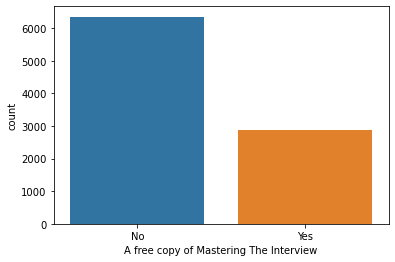

In [118]:
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.show()

#### 22. Last Notable Activity

In [119]:
lead_df['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [120]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

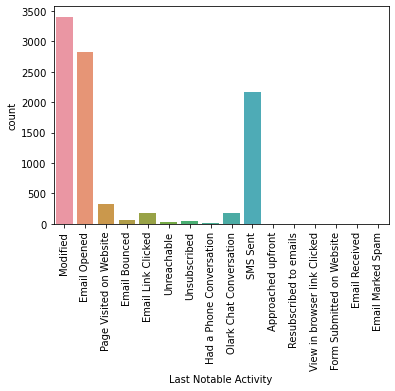

In [121]:
sns.countplot(lead_df['Last Notable Activity'])
plt.xticks(rotation=90)
plt.show()

In [122]:
#Checking for percantage of distibution
OtherCol=(lead_df['Last Notable Activity'].value_counts()*100)/lead_df.shape[0]
OtherCol

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Email Received                   0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

In [123]:
#Last Notable Activity Columns having less than 5% values
OtherCol=OtherCol[OtherCol<5]
for i in OtherCol.index:
    lead_df.loc[(lead_df['Last Notable Activity'] == i),'Last Notable Activity']='Other Activity'
#Checking for percantage of distibution
(lead_df['Last Notable Activity'].value_counts()*100)/lead_df.shape[0]

Modified          36.872294
Email Opened      30.595238
SMS Sent          23.506494
Other Activity     9.025974
Name: Last Notable Activity, dtype: float64

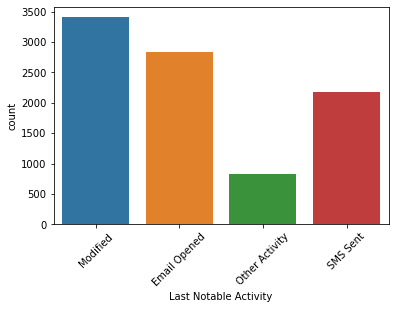

In [124]:
sns.countplot(lead_df['Last Notable Activity'])
plt.xticks(rotation=45)
plt.show()

#### 23. City

In [125]:
lead_df['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [126]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [127]:
#It can be seen than, Mumbai City is coming the most times , hence replacing NaN value with value - Mumbai
lead_df['City'] = lead_df['City'].fillna("Mumbai")

In [128]:
lead_df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

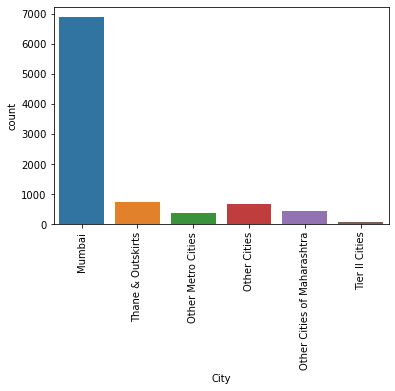

In [129]:
sns.countplot(lead_df['City'])
plt.xticks(rotation=90)
plt.show()

In [130]:
#Checking for percantage of distibution
lead_df['City'].value_counts()*100/lead_df.shape[0]

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

### Checking and imputing numerical values

#### 1. Lead Number

In [131]:
lead_df['Lead Number'].describe()

count      9240.000000
mean     617188.435606
std       23405.995698
min      579533.000000
25%      596484.500000
50%      615479.000000
75%      637387.250000
max      660737.000000
Name: Lead Number, dtype: float64

In [132]:
lead_df['Lead Number'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count      9240.000000
mean     617188.435606
std       23405.995698
min      579533.000000
5%       582869.900000
25%      596484.500000
50%      615479.000000
75%      637387.250000
90%      650506.100000
95%      655404.050000
99%      659592.980000
max      660737.000000
Name: Lead Number, dtype: float64

<AxesSubplot:xlabel='Lead Number'>

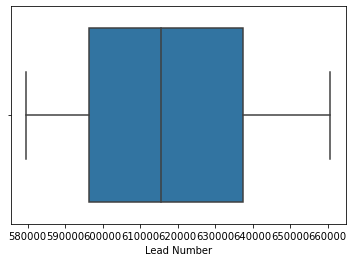

In [133]:
sns.boxplot(lead_df['Lead Number'])

#### 2. TotalVisits

In [134]:
lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

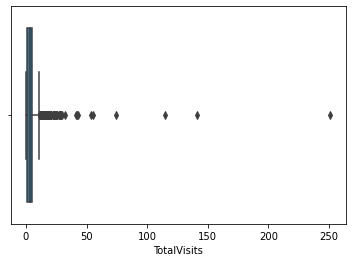

In [135]:
sns.boxplot(lead_df['TotalVisits'])

In [136]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [137]:
# imputing the null value with median of the column
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median(), inplace=True)

#### 3. Total Time Spent on Website

In [138]:
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

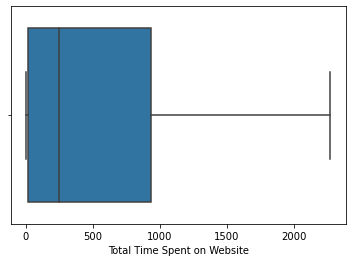

In [139]:
sns.boxplot(lead_df['Total Time Spent on Website'])

In [140]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other Last Activity,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### 4. Page Views Per Visit

In [141]:
lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

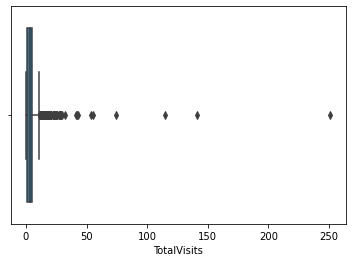

In [142]:
sns.boxplot(lead_df['TotalVisits'])

In [143]:
# imputing the null value with median of the column
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(), inplace=True)

#### Checking for null values

In [144]:
#checking for null values
lead_df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Data Cleaning have been done, no null values present

In [145]:
lead_df.shape

(9240, 15)

There are now 15 columns present.

# Step 3. EDA

#### 3.1 Univariate Analysis

- Categorical Variables

In [146]:
lead_df.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

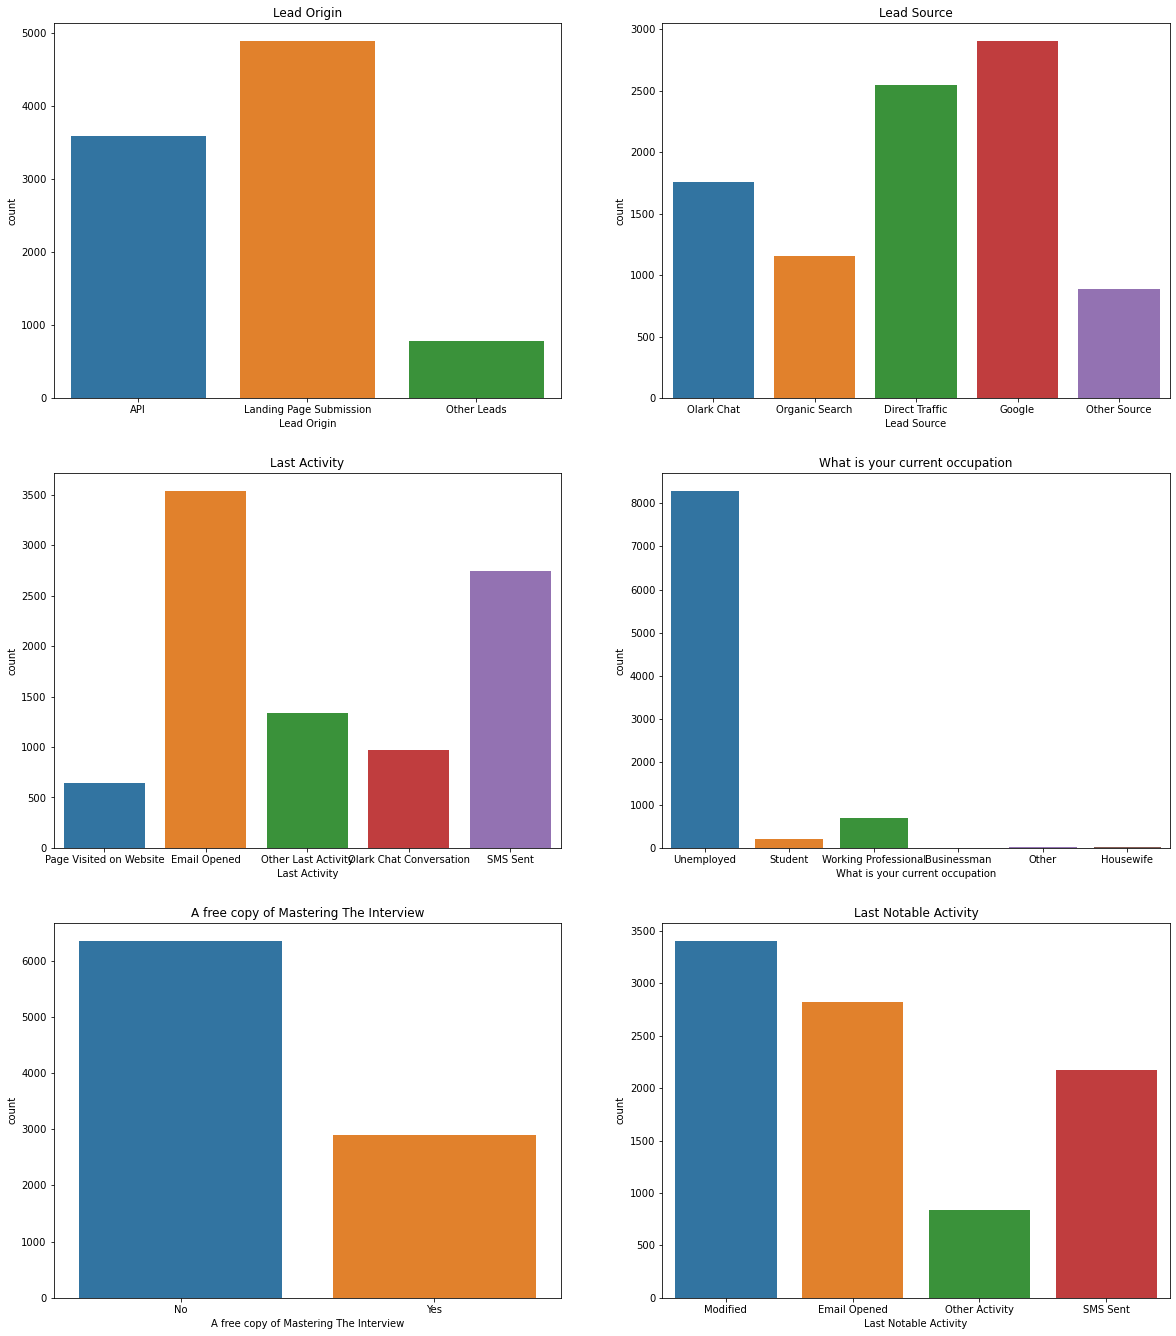

In [147]:
plt.figure(figsize = (20,40))

plt.subplot(5,2,1)
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(5,2,2)
sns.countplot(lead_df['Lead Source'])
plt.title('Lead Source')

plt.subplot(5,2,3)
sns.countplot(lead_df['Last Activity'])
plt.title('Last Activity')

plt.subplot(5,2,4)
sns.countplot(lead_df['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(5,2,5)
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(5,2,6)
sns.countplot(lead_df['Last Notable Activity'])
plt.title('Last Notable Activity')


plt.show()

- Observations
1. Many Lead Origin are coming from API and Landing Page Submission.
2. The majority of the leads are coming from Google, which can be used further via SEO,adds campaign to attract more professionals.
3. Also Direct Traffic also brings us good leads, while there is very leads coming from Oragnic Search so didn't much rely on that.
4. As we can see many of the potential leads last activity as email opened or sms sent , which can be good medium to communicate with them.
5. Unemployed are more looking for some professional course, but doubt they can really joined the course, so some special crash  course can be provided to them which can help to crack jobs and then they can be converted to one of our professional course. 
6. Majority of the people have not opted for free copy of Mastering the interviews.

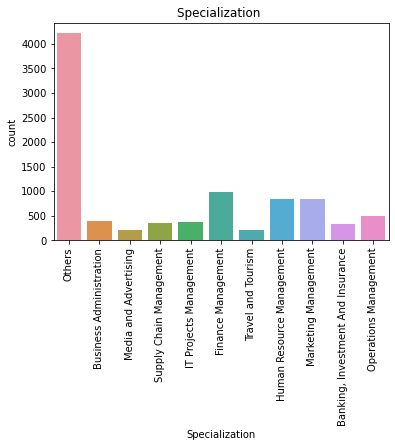

In [148]:
sns.countplot(lead_df['Specialization'])
plt.title('Specialization ')
plt.xticks(rotation=90)
plt.show()


- Observation :  
It can be seen that many of the learners are looking for some different kind of specialization, which can be added into the curriculum.

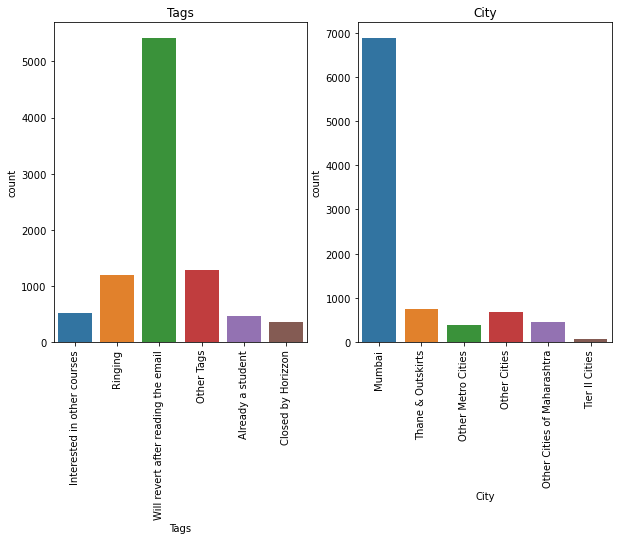

In [149]:
plt.figure(figsize = (10,20))

plt.subplot(3,2,1)
sns.countplot(lead_df['Tags'])
plt.title('Tags')
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.countplot(lead_df['City'])
plt.title('City')
plt.xticks(rotation=90)

plt.show()

- Observation
1. Many of the learners are reverting back after reading the email, it seems that professional way of approcahing like email, gives them a bit of trust on the platform.
2. Majority of the learners are from city - Mumbai.

- Numerical Variables

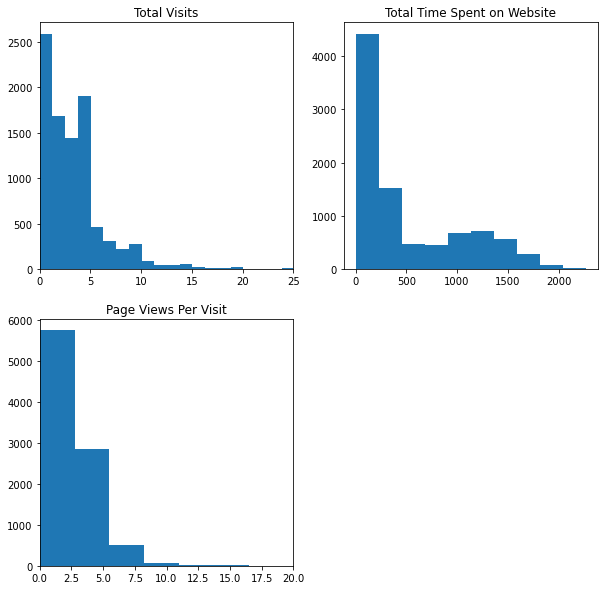

In [150]:

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()


- Observations
1. Many of the customers have visited atmost 2 times only, it seems that they are enough to make up their mind by visiting the site in 1 time only.

#### 3.2 Bivariate Analysis

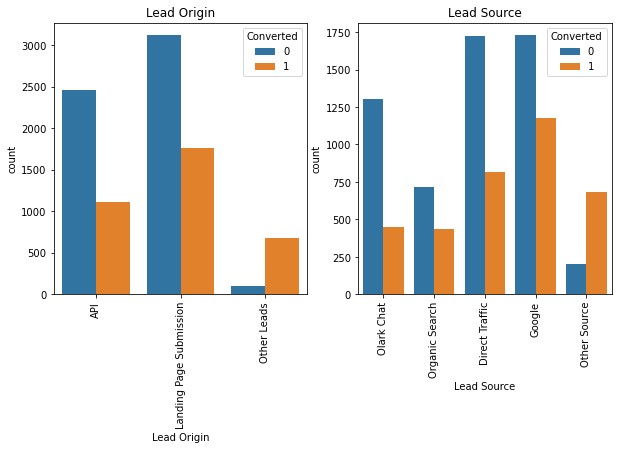

In [151]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

- Observations
1. Conversion rate coming from other leads is very much higher which means they have approach to the website via some sort of referral, which means have some bit of early makeup of mind of pursuing the course.
2. Similary is the case for the one who is landing on the website from some other source.

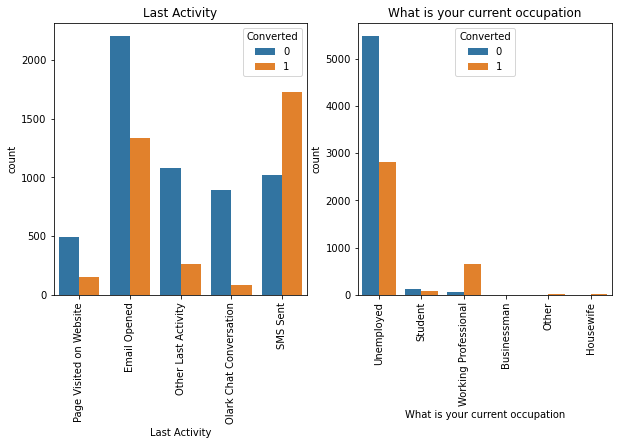

In [152]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

- Observations
1. It looks like conversion rate is higher when sms is sent.
2. As mentioned from before observations also that rate of conversion will be very low for unemployed as compared to professionals who have almost 90% of conversion rate.

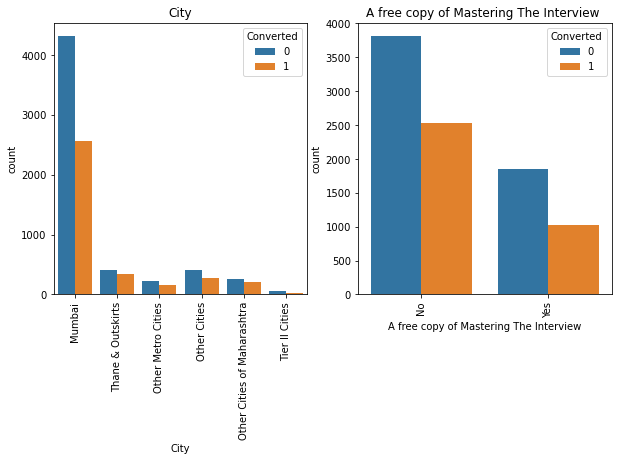

In [153]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='City', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview ')
plt.show()

- Observations :
Above two columns doesn't give positive response of the converstion rate.

Text(0.5, 1.0, 'Last Notable Activity')

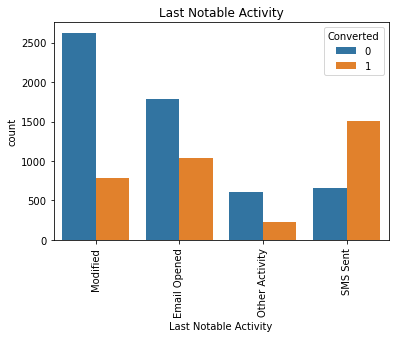

In [154]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


- Observation: 
1. Conversion rate is higher when sms is sent or the email is opened by the learner.

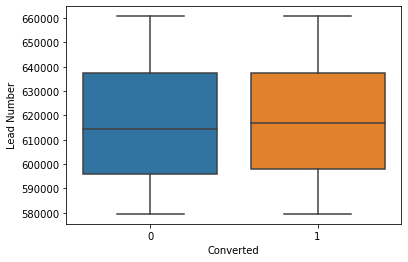

In [155]:
sns.boxplot(data=lead_df,x='Converted',y='Lead Number')
plt.show()

- Observation :
    Conversion rate doesn't depends on how much have visited the page.

# Step 4. Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [156]:
lead_df['A free copy of Mastering The Interview']=lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [157]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other Last Activity,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [158]:
lead_df.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
dtype: object

#### For categorical variables with multiple levels, creating dummy features 

In [159]:
catColumns=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']
catColumns

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

In [160]:
dummyVarible=pd.get_dummies(lead_df[catColumns],drop_first=True) #Drop the first column from status df using 'drop_first = True'
dummyVarible.head()

,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other Activity,Last Notable Activity_SMS Sent
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [161]:
dummyVarible.shape

(9240, 38)

Now, there are new 38 columns

In [162]:
# Add the results to the original bike dataframe
lead_df = pd.concat([lead_df,dummyVarible], axis = 1)

In [163]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other Activity,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other Last Activity,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [164]:
lead_df.shape

(9240, 53)

Now, for our lead data there are 53 columns from which observations have to be make

#### Droping the columns

In [165]:
# Drop columns for which we have created the dummies
lead_df.drop(catColumns, axis = 1, inplace = True)

In [166]:
# dropping extra columns from the dataset   
lead_df.drop(['Lead Origin_Other Leads','Lead Source_Other Source','Last Activity_Other Last Activity','Specialization_Others','What is your current occupation_Other','Tags_Other Tags','City_Other Cities','Last Notable Activity_Other Activity'],axis=1,inplace=True)

In [167]:
lead_df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [168]:
lead_df.shape

(9240, 37)

In [169]:
#Dropping other column
lead_df.drop(['Prospect ID'], axis = 1, inplace = True)

In [170]:
lead_df.shape

(9240, 36)

In [171]:
lead_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## Train-Test Split 

In [172]:
# Putting feature variable to X
X = lead_df.drop(['Converted'], axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0.0,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,660728,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,660681,2.0,1428,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [173]:
# Putting response variable to y
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [174]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Selection

In [175]:
X_train.dtypes

Lead Number                                               int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
A free copy of Mastering The Interview                    int64
Lead Origin_Landing Page Submission                       uint8
Lead Source_Google                                        uint8
Lead Source_Olark Chat                                    uint8
Lead Source_Organic Search                                uint8
Last Activity_Olark Chat Conversation                     uint8
Last Activity_Page Visited on Website                     uint8
Last Activity_SMS Sent                                    uint8
Specialization_Business Administration                    uint8
Specialization_Finance Management                         uint8
Specialization_Human Resource Management                  uint8
Specialization_IT Projects Management   

In [176]:
scaler = MinMaxScaler()
X_train[['Lead Number','TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['Lead Number','TotalVisits','Page Views Per Visit','Total Time Spent on Website']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1871,0.762079,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
6795,0.223585,0.015936,0.214349,0.024182,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3516,0.582450,0.019920,0.046655,0.045455,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8105,0.103393,0.019920,0.541373,0.090909,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3934,0.527532,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [177]:
### Checking the Converted Rate
convertRate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
convertRate

38.53896103896104

### Looking at Correlations

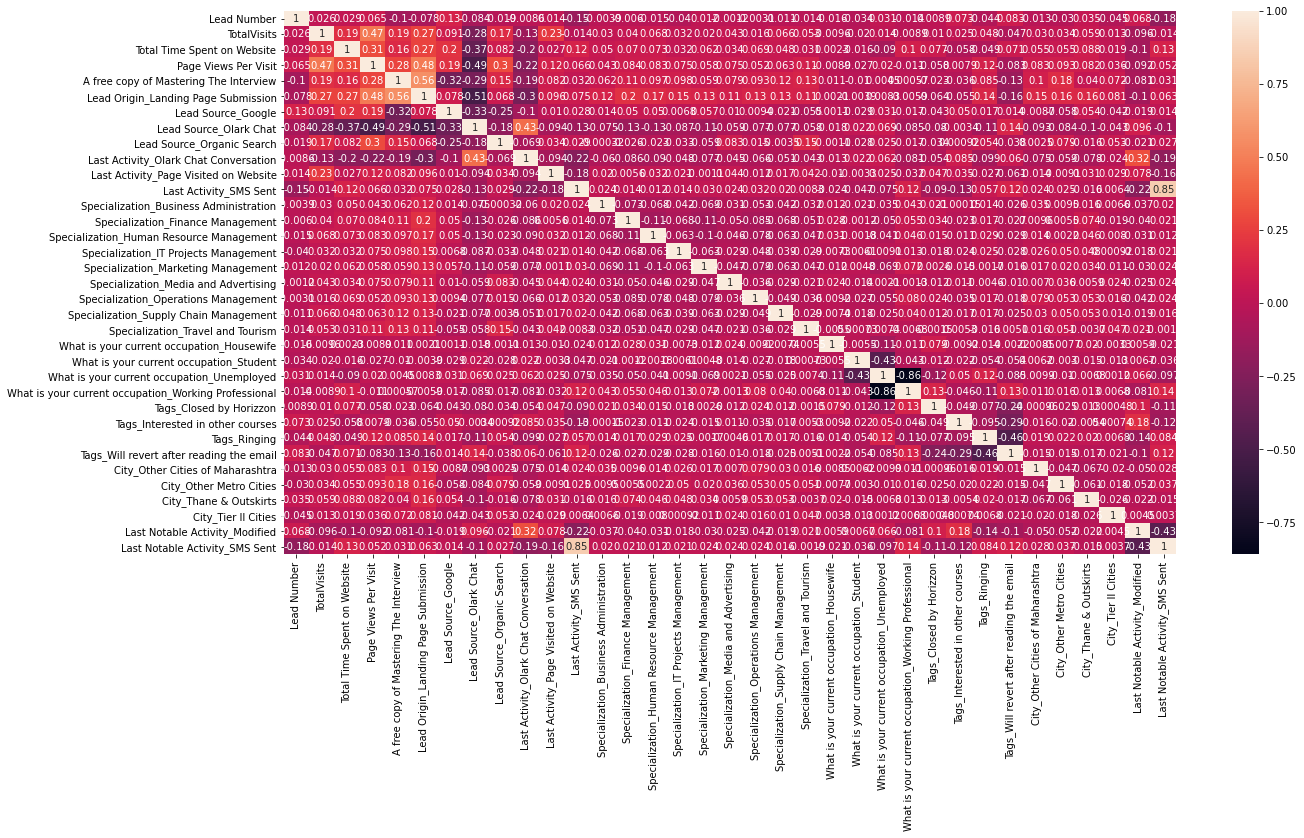

In [178]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Step 5. Model Building

### RFE
Recursive Fetaure Selection 

In [179]:
# Building 1st logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2119.7
Date:                Wed, 11 Aug 2021   Deviance:                       4239.3
Time:                        22:32:21   Pearson chi2:                 9.84e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1614      0.806     -2.682      0.007      -3.741      -0.582
Lead Number                                              0.6867      0.142      4.849      0.000       0.409       0.964
TotalVisits                                              5.7826      1.659      3.485      0.000       2.530       9.035
Total Time Spent on Website                              4.1799      0.190     22.016      0.000       3.808       4.552
Page Views Per Visit                                    -5.2701      1.467     -3.593      0.000      -8.145      -2.396
A free copy of Mastering The Interview                  -0.3794      0.118     -3.225      0.001      -0.610      -0.149
Lead Origin_Landing Page Submission                     -1.1492      0.126     -9.098      0.000      -1.397      -0.902
Lead Source_Google                                      -0.5021      0.110     -4.563      0.000      -0.718      -0.286
Lead Source_Olark Chat                                  -0.3577      0.138     -2.586      0.010      -0.629      -0.087
Lead Source_Organic Search                              -0.3310      0.142     -2.334      0.020      -0.609      -0.053
Last Activity_Olark Chat Conversation                   -1.0964      0.185     -5.936      0.000      -1.458      -0.734
Last Activity_Page Visited on Website                   -0.7538      0.175     -4.296      0.000      -1.098      -0.410
Last Activity_SMS Sent                                   0.9892      0.162      6.089      0.000       0.671       1.308
Specialization_Business Administration                   0.7900      0.206      3.844      0.000       0.387       1.193
Specialization_Finance Management                        1.0364      0.149      6.959      0.000       0.744       1.328
Specialization_Human Resource Management                 0.8931      0.157      5.693      0.000       0.586       1.201
Specialization_IT Projects Management                    0.9981      0.224      4.461      0.000       0.560       1.437
Specialization_Marketing Management                      0.8610      0.151      5.699      0.000       0.565       1.157
Specialization_Media and Advertising                     0.9638      0.274      3.515      0.000       0.426       1.501
Specialization_Operations Management                     0.7100      0.192      3.702      0.000       0.334       1.086
Specialization_Supply Chain Management                   0.7507      0.223      3.369      0.001       0.314       1.187
Specialization_Travel and Tourism                        0.4450      0.293      1.517      0.129      -0.130       1.020
What is your current occupation_Housewife               21

In [180]:
#Feature selection using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [181]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 10),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 5),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_Marketing Management', False, 2),
 ('Specialization_Media and Advertising', False, 3),
 ('Specialization_Operations Management', False, 6),
 ('Specialization_Supply Chain Management', False, 4),
 ('Specialization_Travel and Tourism', False, 9),
 ('What is your curren

In [182]:
#columns which may be using for our model building
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [183]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Specialization_Business Administration',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

In [184]:
X_train=X_train[col]

### Building model using statsmodel, for the detailed statistics

In [185]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.2
Date:                Wed, 11 Aug 2021   Deviance:                       4322.3
Time:                        22:32:26   Pearson chi2:                 8.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7916      0.259     -6.922      0.000      -2.299      -1.284
Lead Number                                              0.7529      0.138      5.453      0.000       0.482       1.023
TotalVisits                                              5.7656      1.646      3.503      0.000       2.539       8.992
Total Time Spent on Website                              4.1474      0.183     22.701      0.000       3.789       4.505
Page Views Per Visit                                    -6.3324      1.347     -4.703      0.000      -8.972      -3.693
Lead Origin_Landing Page Submission                     -0.8066      0.099     -8.155      0.000      -1.000      -0.613
Last Activity_Olark Chat Conversation                   -1.2129      0.178     -6.827      0.000      -1.561      -0.865
Last Activity_Page Visited on Website                   -0.7252      0.173     -4.191      0.000      -1.064      -0.386
Last Activity_SMS Sent                                   1.0075      0.160      6.300      0.000       0.694       1.321
Specialization_Finance Management                        0.6073      0.131      4.638      0.000       0.351       0.864
Specialization_Human Resource Management                 0.4470      0.140      3.201      0.001       0.173       0.721
Specialization_IT Projects Management                    0.5847      0.213      2.746      0.006       0.167       1.002
What is your current occupation_Housewife               21.4603   1.29e+04      0.002      0.999   -2.53e+04    2.54e+04
What is your current occupation_Unemployed              -0.8257      0.244     -3.390      0.001      -1.303      -0.348
What is your current occupation_Working Professional     1.9631      0.322      6.099      0.000       1.332       2.594
Tags_Closed by Horizzon                                  7.5999      1.016      7.482      0.000       5.609       9.591
Tags_Interested in other courses                        -1.7810      0.362     -4.925      0.000      -2.490      -1.072
Tags_Ringing                                            -2.8677      0.241    -11.900      0.000      -3.340      -2.395
Tags_Will revert after reading the email                 1.5695      0.105     14.996      0.000       1.364       1.775
Last Notable Activity_Modified                          -0.8839      0.105     -8.457      0.000      -1.089      -0.679
Last Notable Activity_SMS Sent                           1.1193      0.188      5.964      0.000       0.751       1.487
========================================================================================================================
"""

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [186]:
vif=pd.DataFrame()
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
12,What is your current occupation_Unemployed,9.85
19,Last Notable Activity_SMS Sent,6.42
7,Last Activity_SMS Sent,6.28
17,Tags_Will revert after reading the email,4.37
0,Lead Number,3.75
3,Page Views Per Visit,3.59
4,Lead Origin_Landing Page Submission,3.32
18,Last Notable Activity_Modified,2.51
2,Total Time Spent on Website,2.14
13,What is your current occupation_Working Profes...,1.97


In [187]:
#Dropping highly insignificant variables which is 'What is your current occupation_Housewife'
X_train = X_train.drop('What is your current occupation_Housewife', 1,)

In [188]:
#Rebuilding the model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2164.0
Date:                Wed, 11 Aug 2021   Deviance:                       4328.0
Time:                        22:32:27   Pearson chi2:                 8.94e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6875      0.251     -6.723      0.000      -2.180      -1.196
Lead Number                                              0.7486      0.138      5.422      0.000       0.478       1.019
TotalVisits                                              5.7597      1.647      3.497      0.000       2.532       8.987
Total Time Spent on Website                              4.1434      0.183     22.686      0.000       3.785       4.501
Page Views Per Visit                                    -6.3580      1.347     -4.719      0.000      -8.998      -3.718
Lead Origin_Landing Page Submission                     -0.8045      0.099     -8.139      0.000      -0.998      -0.611
Last Activity_Olark Chat Conversation                   -1.2171      0.178     -6.851      0.000      -1.565      -0.869
Last Activity_Page Visited on Website                   -0.7311      0.173     -4.225      0.000      -1.070      -0.392
Last Activity_SMS Sent                                   1.0047      0.160      6.284      0.000       0.691       1.318
Specialization_Finance Management                        0.6129      0.131      4.692      0.000       0.357       0.869
Specialization_Human Resource Management                 0.4621      0.139      3.321      0.001       0.189       0.735
Specialization_IT Projects Management                    0.5838      0.213      2.743      0.006       0.167       1.001
What is your current occupation_Unemployed              -0.9363      0.236     -3.975      0.000      -1.398      -0.475
What is your current occupation_Working Professional     1.8514      0.316      5.864      0.000       1.233       2.470
Tags_Closed by Horizzon                                  7.6158      1.016      7.499      0.000       5.625       9.606
Tags_Interested in other courses                        -1.7757      0.362     -4.911      0.000      -2.484      -1.067
Tags_Ringing                                            -2.8603      0.241    -11.870      0.000      -3.333      -2.388
Tags_Will revert after reading the email                 1.5796      0.105     15.100      0.000       1.375       1.785
Last Notable Activity_Modified                          -0.8824      0.104     -8.455      0.000      -1.087      -0.678
Last Notable Activity_SMS Sent                           1.1213      0.188      5.975      0.000       0.753       1.489
========================================================================================================================
"""

In [189]:
#Checking for vif
vif=pd.DataFrame()
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
11,What is your current occupation_Unemployed,9.74
18,Last Notable Activity_SMS Sent,6.41
7,Last Activity_SMS Sent,6.28
16,Tags_Will revert after reading the email,4.34
0,Lead Number,3.75
3,Page Views Per Visit,3.59
4,Lead Origin_Landing Page Submission,3.31
17,Last Notable Activity_Modified,2.50
2,Total Time Spent on Website,2.14
1,TotalVisits,1.95


In [190]:
#Dropping another insignificant variables which is 'What is your current occupation_Unemployed'
X_train = X_train.drop('What is your current occupation_Unemployed', 1,)

In [191]:
#Rebuilding the model
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2171.6
Date:                Wed, 11 Aug 2021   Deviance:                       4343.2
Time:                        22:32:28   Pearson chi2:                 8.84e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5439      0.138    -18.407      0.000      -2.815      -2.273
Lead Number                                              0.7227      0.137      5.264      0.000       0.454       0.992
TotalVisits                                              5.7115      1.645      3.472      0.001       2.488       8.935
Total Time Spent on Website                              4.1421      0.182     22.730      0.000       3.785       4.499
Page Views Per Visit                                    -6.4280      1.343     -4.785      0.000      -9.061      -3.795
Lead Origin_Landing Page Submission                     -0.8018      0.099     -8.129      0.000      -0.995      -0.608
Last Activity_Olark Chat Conversation                   -1.2261      0.177     -6.916      0.000      -1.574      -0.879
Last Activity_Page Visited on Website                   -0.7256      0.172     -4.207      0.000      -1.064      -0.388
Last Activity_SMS Sent                                   0.9816      0.159      6.159      0.000       0.669       1.294
Specialization_Finance Management                        0.6058      0.130      4.650      0.000       0.350       0.861
Specialization_Human Resource Management                 0.4631      0.139      3.334      0.001       0.191       0.735
Specialization_IT Projects Management                    0.5758      0.213      2.701      0.007       0.158       0.994
What is your current occupation_Working Professional     2.7555      0.220     12.538      0.000       2.325       3.186
Tags_Closed by Horizzon                                  7.5746      1.015      7.462      0.000       5.585       9.564
Tags_Interested in other courses                        -1.7982      0.361     -4.977      0.000      -2.506      -1.090
Tags_Ringing                                            -2.9010      0.240    -12.063      0.000      -3.372      -2.430
Tags_Will revert after reading the email                 1.5453      0.104     14.849      0.000       1.341       1.749
Last Notable Activity_Modified                          -0.8864      0.104     -8.507      0.000      -1.091      -0.682
Last Notable Activity_SMS Sent                           1.1121      0.187      5.942      0.000       0.745       1.479
========================================================================================================================
"""

In [192]:
#Checking for vif
vif=pd.DataFrame()
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
17,Last Notable Activity_SMS Sent,6.29
7,Last Activity_SMS Sent,6.28
3,Page Views Per Visit,3.57
0,Lead Number,3.15
15,Tags_Will revert after reading the email,3.10
4,Lead Origin_Landing Page Submission,3.07
16,Last Notable Activity_Modified,2.31
2,Total Time Spent on Website,2.14
1,TotalVisits,1.95
14,Tags_Ringing,1.46


In [193]:
#Dropping another insignificant variables which is 'Last Activity_SMS Sent'
X_train = X_train.drop('Last Activity_SMS Sent', 1,)

In [194]:
#Rebuilding the model
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2190.3
Date:                Wed, 11 Aug 2021   Deviance:                       4380.5
Time:                        22:32:29   Pearson chi2:                 8.53e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5364      0.137    -18.466      0.000      -2.806      -2.267
Lead Number                                              0.6901      0.137      5.052      0.000       0.422       0.958
TotalVisits                                              6.0256      1.646      3.661      0.000       2.800       9.251
Total Time Spent on Website                              4.1173      0.181     22.719      0.000       3.762       4.472
Page Views Per Visit                                    -6.0407      1.329     -4.545      0.000      -8.646      -3.436
Lead Origin_Landing Page Submission                     -0.7908      0.098     -8.074      0.000      -0.983      -0.599
Last Activity_Olark Chat Conversation                   -1.4351      0.173     -8.295      0.000      -1.774      -1.096
Last Activity_Page Visited on Website                   -0.8598      0.170     -5.064      0.000      -1.193      -0.527
Specialization_Finance Management                        0.5794      0.130      4.467      0.000       0.325       0.834
Specialization_Human Resource Management                 0.4462      0.138      3.233      0.001       0.176       0.717
Specialization_IT Projects Management                    0.5471      0.211      2.593      0.010       0.134       0.961
What is your current occupation_Working Professional     2.7155      0.218     12.481      0.000       2.289       3.142
Tags_Closed by Horizzon                                  7.4682      1.014      7.368      0.000       5.482       9.455
Tags_Interested in other courses                        -1.8825      0.359     -5.243      0.000      -2.586      -1.179
Tags_Ringing                                            -2.8867      0.240    -12.024      0.000      -3.357      -2.416
Tags_Will revert after reading the email                 1.5613      0.103     15.095      0.000       1.359       1.764
Last Notable Activity_Modified                          -0.6001      0.091     -6.628      0.000      -0.778      -0.423
Last Notable Activity_SMS Sent                           2.0705      0.106     19.582      0.000       1.863       2.278
========================================================================================================================
"""

In [195]:
#Checking for vif
vif=pd.DataFrame()
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
3,Page Views Per Visit,3.57
0,Lead Number,3.15
14,Tags_Will revert after reading the email,3.09
4,Lead Origin_Landing Page Submission,3.07
2,Total Time Spent on Website,2.14
1,TotalVisits,1.95
15,Last Notable Activity_Modified,1.95
16,Last Notable Activity_SMS Sent,1.59
13,Tags_Ringing,1.46
5,Last Activity_Olark Chat Conversation,1.36


Now it seems that our model is ready, and no columns have any multicollineraity issue , i.e. all are significant.

In [196]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.007412
6795    0.314521
3516    0.006802
8105    0.093450
3934    0.229495
4844    0.997289
3297    0.002842
8071    0.999495
987     0.601392
7423    0.981037
dtype: float64

In [197]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0074119 , 0.31452132, 0.0068025 , 0.09344958, 0.2294945 ,
       0.99728877, 0.00284193, 0.9994947 , 0.60139171, 0.98103731])

##### Creating a dataframe with the actual converted  and the predicted probabilities

In [198]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.007412,1871
1,0,0.314521,6795
2,0,0.006802,3516
3,0,0.093450,8105
4,0,0.229495,3934


In [199]:
y_train_pred_final

,Converted,Converted_Prob,ID
0,0,0.007412,1871
1,0,0.314521,6795
2,0,0.006802,3516
3,0,0.093450,8105
4,0,0.229495,3934
...,...,...,...
6463,1,0.420831,350
6464,1,0.950339,79
6465,1,0.288702,8039
6466,0,0.028639,6936


In [200]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.007412,1871,0
1,0,0.314521,6795,0
2,0,0.006802,3516,0
3,0,0.093450,8105,0
4,0,0.229495,3934,0


In [201]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.858843537414966


Here Accuracy is almost 86% , which seems to be quiet good, but our main aim is to build a model wherein lead score to each of the leads such that the customers with higher lead score have a higher conversion chance. 
Here our main aim should be to increase Sensitivity rate rather than accuracy.

### Metrics beyond simply accuracy

In [202]:
# First check other metircs like sensitivity , specificity taking the above threshold value which is 0.5.
# Let's take a look at the confusion matrix  
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3686,  316],
       [ 597, 1869]], dtype=int64)

In [203]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [204]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7579075425790754

In [205]:
# Let us calculate specificity
TN / float(TN+FP)

0.92103948025987

In [206]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07896051974012994


In [207]:
# positive predictive value 
print (TP / float(TP+FP))

0.8553775743707094


In [208]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8606117207564791


### Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [209]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

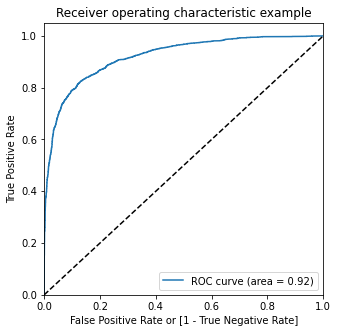

In [210]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [211]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007412,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.314521,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.006802,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.093450,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.229495,3934,0,1,1,1,0,0,0,0,0,0,0


In [212]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.701299  0.960260  0.541729
0.2   0.2  0.771181  0.922141  0.678161
0.3   0.3  0.824057  0.870641  0.795352
0.4   0.4  0.853896  0.808597  0.881809
0.5   0.5  0.858844  0.757908  0.921039
0.6   0.6  0.854824  0.712490  0.942529
0.7   0.7  0.843692  0.656529  0.959020
0.8   0.8  0.812925  0.548256  0.976012
0.9   0.9  0.764842  0.396188  0.992004


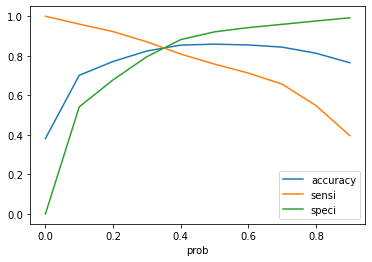

In [213]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

###### From the curve above, 0.4 is the optimum point to take it as a cutoff probability , but as our main focus on sensitivity it seems 0.35 will be good threshold point keeping accuracy and specificity in a good range (above 75%). 

In [214]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.007412,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.314521,6795,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.006802,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.093450,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.229495,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [215]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8450834879406308

In [216]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3394,  608],
       [ 394, 2072]], dtype=int64)

In [217]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [218]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8402270884022709

In [219]:
# Let us calculate specificity
TN / float(TN+FP)

0.8480759620189905

In [220]:
# Calculate false postive rate - predicting converted when the lead does not have converted
print(FP/ float(TN+FP))

0.1519240379810095


In [221]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7731343283582089


In [222]:
# Negative predictive value
print (TN / float(TN+ FN))

0.895987328405491


### Plotting ROC curve

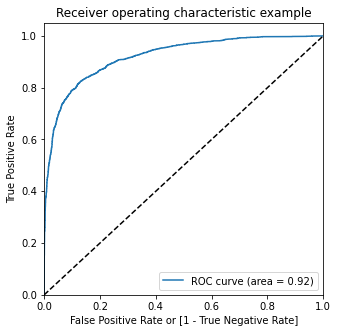

In [223]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Precision and Recall
Considering this two metrics also, which might be useful for future business.

In [224]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3686,  316],
       [ 597, 1869]], dtype=int64)

##### Precision
TP / TP + FP

In [225]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7731343283582089

##### Recall
TP / TP + FN

In [226]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8402270884022709

#### Precision and recall tradeoff

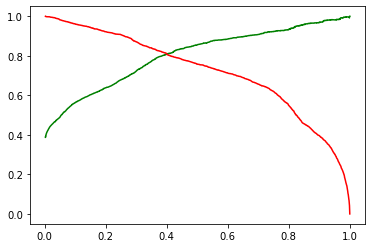

In [227]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [228]:
#Scaling the test set
X_test[['Lead Number','TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['Lead Number','TotalVisits','Page Views Per Visit','Total Time Spent on Website']])
X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
4269,0.486114,0.031873,0.444982,0.145455,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2376,0.706337,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7766,0.132373,0.019920,0.025968,0.090909,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
9199,0.004421,0.000000,0.000000,0.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4359,0.472886,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [229]:
X_test=X_test[col]

In [230]:
#Dropping columns which have been dropped in X_train dataset
#Dropping highly insignificant variables which is 'What is your current occupation_Housewife'
X_test = X_test.drop('What is your current occupation_Housewife', 1,)
#Dropping another insignificant variables which is 'What is your current occupation_Unemployed'
X_test = X_test.drop('What is your current occupation_Unemployed', 1,)
#Dropping another insignificant variables which is 'Last Activity_SMS Sent'
X_test = X_test.drop('Last Activity_SMS Sent', 1,)

In [231]:
#Predicting on the test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.929324
2376    0.829602
7766    0.818992
9199    0.010266
4359    0.343273
9186    0.711489
1631    0.681795
8963    0.362566
8007    0.206744
5324    0.737639
dtype: float64

In [232]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
4269,0.929324
2376,0.829602
7766,0.818992
9199,0.010266
4359,0.343273


In [233]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [234]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,0
0,1,4269,0.929324
1,1,2376,0.829602
2,1,7766,0.818992
3,0,9199,0.010266
4,1,4359,0.343273


In [235]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,Converted_Prob
0,4269,1,0.929324
1,2376,1,0.829602
2,7766,1,0.818992
3,9199,0,0.010266
4,4359,1,0.343273


In [236]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.929324,1
1,2376,1,0.829602,1
2,7766,1,0.818992,1
3,9199,0,0.010266,0
4,4359,1,0.343273,1


In [237]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8203463203463204

In [238]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1325,  352],
       [ 146,  949]], dtype=int64)

In [239]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [240]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8402270884022709

In [241]:
# Let us calculate specificity
TN / float(TN+FP)

0.8480759620189905

Sensitivity is significantly good for the test dataset which is 84%